In [104]:
import requests
import json

# Fetch the list of earthquakes from the provided URL
quakes = requests.get("http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
                      params={
                          'starttime': "2000-01-01",
                          "maxlatitude": "58.723",
                          "minlatitude": "50.008",
                          "maxlongitude": "1.67",
                          "minlongitude": "-9.756",
                          "minmagnitude": "1",
                          "endtime": "2018-10-11",
                          "orderby": "time-asc"}
                      )

# Convert the quakes resonse to json
quake_data = json.loads(quakes.text)['features']

# Parse the quakes to give a list of the information that we care about
parsed_time = [feature['properties']['time'] for feature in quake_data]
parsed_mag = [feature['properties']['mag'] for feature in quake_data]

In [105]:
import pandas as pd

# Import the time and magnitude data to pandas and convert the times to datetime format
df = pd.DataFrame({'Time': parsed_time , 'Magnitude': parsed_mag})
df['Time'] = pd.to_datetime(df['Time'], unit='ms')

# Preview some entries from the dataframe
df.sample(5)

print(

,Time,Magnitude
114,2018-04-01 11:11:01.000,2.7
93,2011-01-03 21:03:09.400,3.6
112,2017-11-01 20:59:22.000,2.6
54,2006-01-12 19:03:52.000,2.6
13,2002-01-30 17:06:05.310,3.4


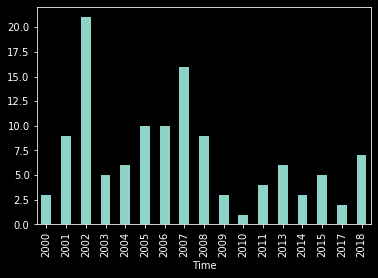

In [107]:
# Group the data by year and plot a bar chart of the number of earthquakes per year
df['Time'].groupby(df['Time'].dt.year).count().plot(kind='bar')

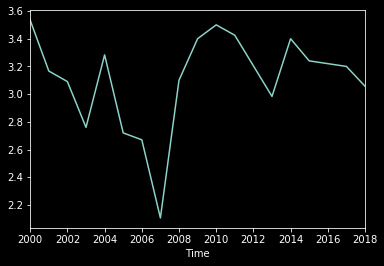

In [108]:
# Group the data by year and plot the mean magnitude of the earthquakes per year
df['Magnitude'].groupby(df['Time'].dt.year).mean().plot()